### Importación de datos



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

tienda_1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##Exloración

In [8]:


# 1. Cambiar nombre de bases de datos por df
df1 = tienda_1
df2 = tienda_2
df3 = tienda_3
df4 = tienda_4

# 2. Uno los 4 DataFrames en uno solo
df_total = pd.concat([df1, df2, df3, df4], ignore_index=True)

# 3. Veo su estructura
df_total.info()
display(df_total.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:
ingreso_tienda_1 = df1['Precio'].sum()
ingreso_tienda_2 = df2['Precio'].sum()
ingreso_tienda_3 = df3['Precio'].sum()
ingreso_tienda_4 = df4['Precio'].sum()

print(f"Ingreso Total Tienda 1: {ingreso_tienda_1}")
print(f"Ingreso Total Tienda 2: {ingreso_tienda_2}")
print(f"Ingreso Total Tienda 3: {ingreso_tienda_3}")
print(f"Ingreso Total Tienda 4: {ingreso_tienda_4}")

Ingreso Total Tienda 1: 1150880400.0
Ingreso Total Tienda 2: 1116343500.0
Ingreso Total Tienda 3: 1098019600.0
Ingreso Total Tienda 4: 1038375700.0


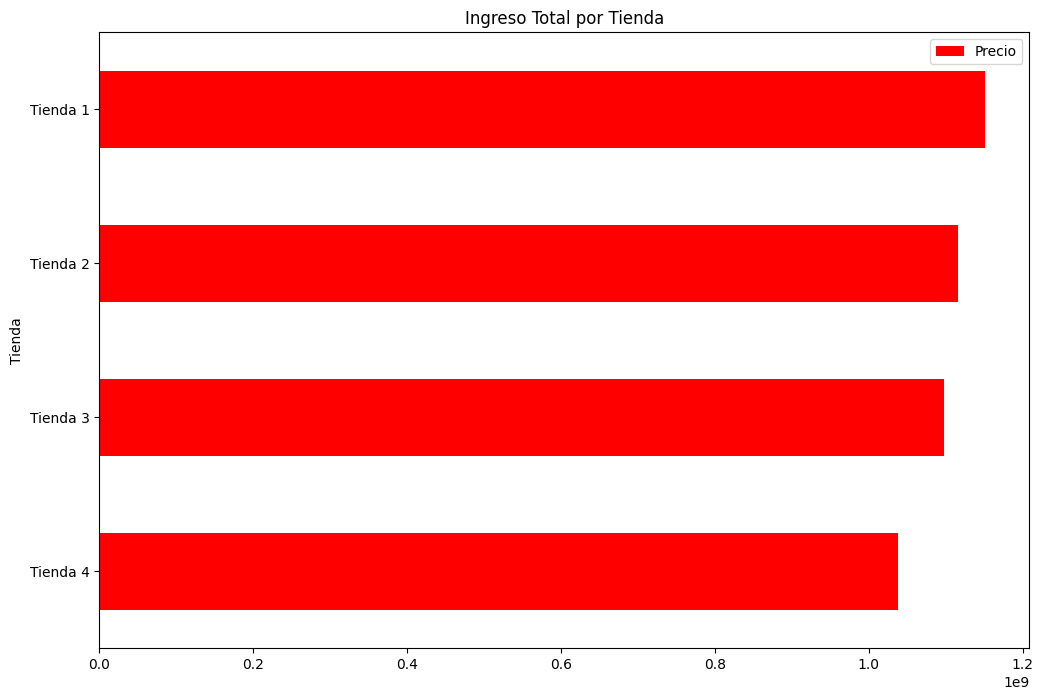

In [11]:


import matplotlib.pyplot as plt


df1['Tienda'] = 'Tienda 1'


df2['Tienda'] = 'Tienda 2'


df3['Tienda'] = 'Tienda 3'


df4['Tienda'] = 'Tienda 4'


datos = pd.concat([df1, df2, df3, df4], ignore_index=True)


df_ingresos = datos.groupby('Tienda')[['Precio']].sum().sort_values('Precio')


df_ingresos.plot(kind='barh', figsize=(12, 8), color='red', title='Ingreso Total por Tienda')


plt.show()

# 2. Ventas por categoría

In [12]:

ventas_categoria = datos.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')


ventas_categoria = ventas_categoria.sort_values(by=['Tienda', 'Cantidad de Ventas'], ascending=[True, False])


display(ventas_categoria)

,Tienda,Categoría del Producto,Cantidad de Ventas
7,Tienda 1,Muebles,465
3,Tienda 1,Electrónicos,448
5,Tienda 1,Juguetes,324
2,Tienda 1,Electrodomésticos,312
1,Tienda 1,Deportes y diversión,284
4,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
0,Tienda 1,Artículos para el hogar,171
15,Tienda 2,Muebles,442
11,Tienda 2,Electrónicos,422


# 3. Calificación promedio de la tienda


In [13]:

import matplotlib.pyplot as plt



df_calificacion = datos.groupby('Tienda')['Calificación'].mean()

print("Promedio de calificaciones por tienda:")
print(df_calificacion.round(2))



Promedio de calificaciones por tienda:
Tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


/tmp/ipython-input-456/3598605223.py:14: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


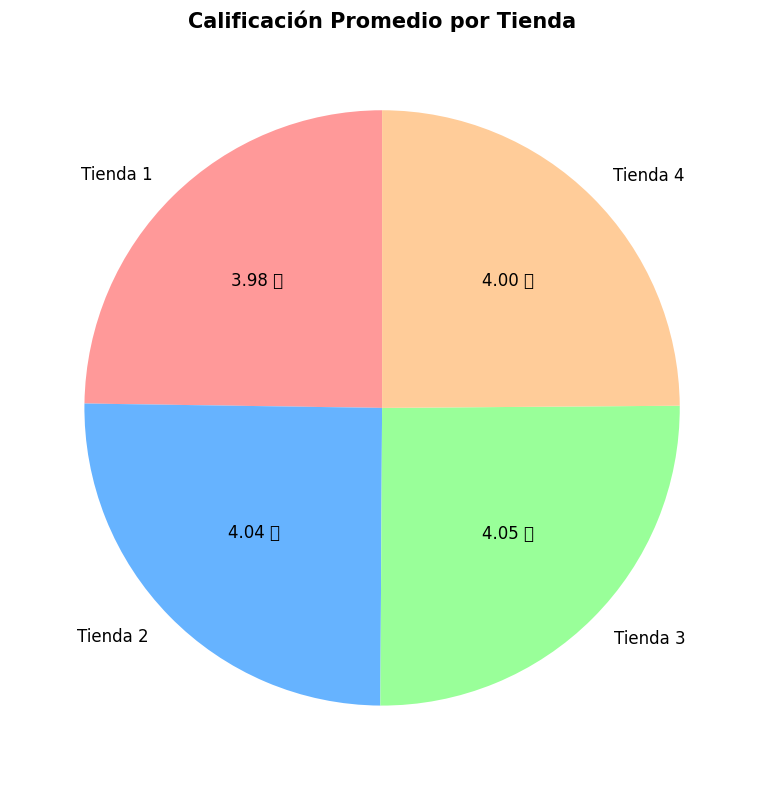

In [14]:

plt.figure(figsize=(8, 8))

df_calificacion.plot(
    kind='pie',
    autopct=lambda p: '{:.2f} ⭐'.format(p * sum(df_calificacion) / 100),
    startangle=90, # Comienza el primer pedazo a las 12 en punto
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], # Colores amigables
    fontsize=12
)

plt.title('Calificación Promedio por Tienda', fontsize=15, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

RESUMEN DE VENTAS:


,Etiqueta,Ventas
1,Tienda 1 - Armario,60
4,Tienda 1 - Auriculares con micrófono,33
75,Tienda 2 - Iniciando en programación,65
77,Tienda 2 - Juego de mesa,32
129,Tienda 3 - Kit de bancas,57
111,Tienda 3 - Bloques de construcción,35
163,Tienda 4 - Cama box,62
175,Tienda 4 - Guitarra eléctrica,33


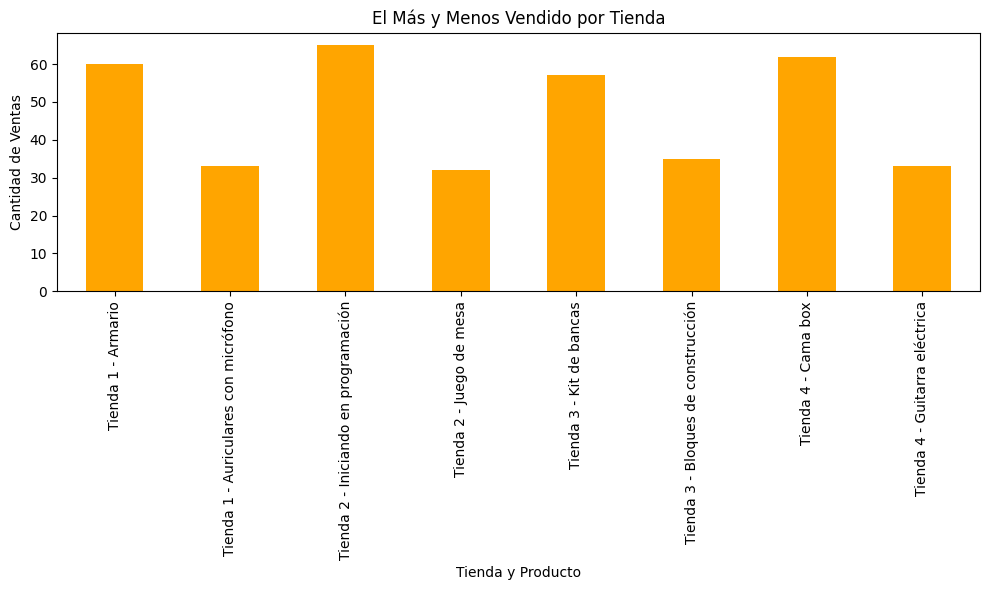

In [15]:
datos = pd.concat([df1, df2, df3, df4], ignore_index=True)


conteo = datos.groupby(['Tienda', 'Producto']).size().reset_index(name='Ventas')

# 4. más vendido y el menos vendido
resultados = []

for tienda in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    datos_tienda = conteo[conteo['Tienda'] == tienda].sort_values(by='Ventas', ascending=False)

    resultados.append(datos_tienda.head(1))
    resultados.append(datos_tienda.tail(1))


df_extremos = pd.concat(resultados)


df_extremos['Etiqueta'] = df_extremos['Tienda'] + ' - ' + df_extremos['Producto']


print("RESUMEN DE VENTAS:")
display(df_extremos[['Etiqueta', 'Ventas']])


df_extremos.plot(kind='bar', x='Etiqueta', y='Ventas', color='orange', figsize=(10, 6), legend=False)


plt.title('El Más y Menos Vendido por Tienda')
plt.xlabel('Tienda y Producto')
plt.ylabel('Cantidad de Ventas')


plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [16]:
promedio_envio = datos.groupby('Tienda')['Costo de envío'].mean().reset_index()


promedio_envio['Costo de envío'] = promedio_envio['Costo de envío'].apply(lambda x: f"${x:,.2f}")


print("Costo de Envío Promedio por Tienda:")
display(promedio_envio)

Costo de Envío Promedio por Tienda:


,Tienda,Costo de envío
0,Tienda 1,"$26,018.61"
1,Tienda 2,"$25,216.24"
2,Tienda 3,"$24,805.68"
3,Tienda 4,"$23,459.46"


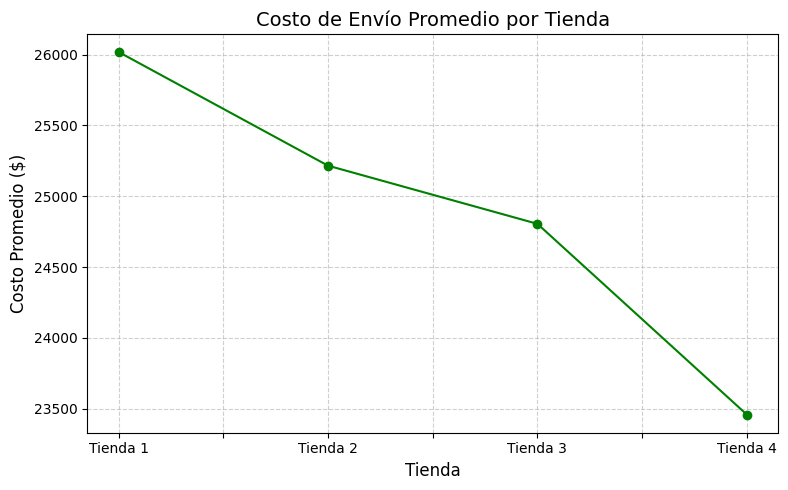

In [17]:

import matplotlib.pyplot as plt


costo_envio = datos.groupby('Tienda')['Costo de envío'].mean().reset_index()


ax = costo_envio.plot(
    kind='line',
    x='Tienda',
    y='Costo de envío',
    marker='o',
    color='green',
    figsize=(8, 5),
    legend=False
)

ax.set_title('Costo de Envío Promedio por Tienda', fontsize=14)
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Costo Promedio ($)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

##Extra: desesmpeño geográfico

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


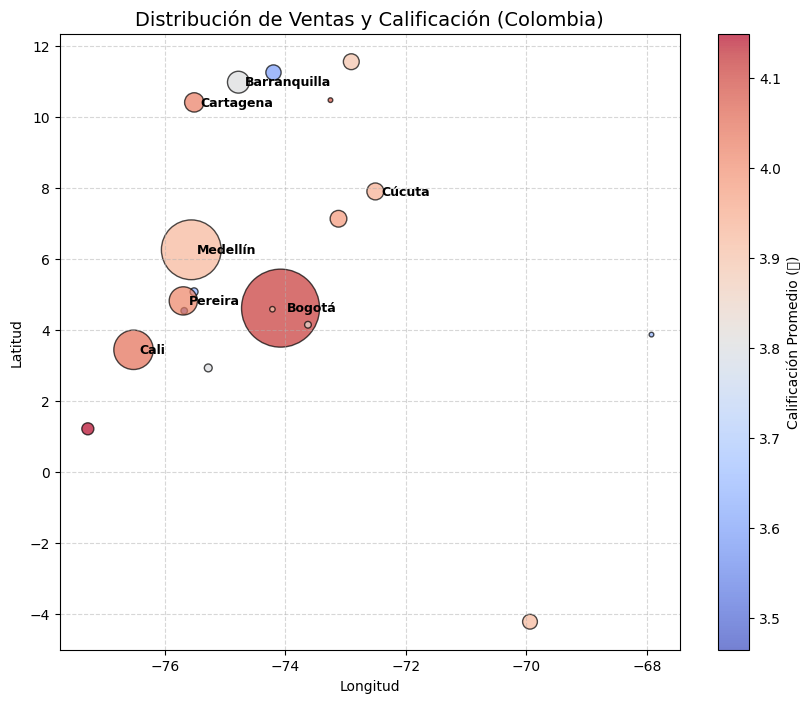

In [18]:

import matplotlib.pyplot as plt


geo_stats = datos.groupby(['Lugar de Compra', 'lat', 'lon']).agg(
    Ventas=('Precio', 'count'),
    Ingresos=('Precio', 'sum'),
    Calificacion=('Calificación', 'mean')
).reset_index()

plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    geo_stats['lon'],
    geo_stats['lat'],
    s=geo_stats['Ventas'] * 0.8,
    c=geo_stats['Calificacion'],
    cmap='coolwarm',
    alpha=0.7, edgecolors='black'
)


cbar = plt.colorbar(scatter)
cbar.set_label('Calificación Promedio (⭐)')


top_ciudades = geo_stats.sort_values('Ventas', ascending=False).head(7)
for _, row in top_ciudades.iterrows():
    plt.text(row['lon'] + 0.1, row['lat'] - 0.1, row['Lugar de Compra'], fontsize=9, fontweight='bold')

plt.title('Distribución de Ventas y Calificación (Colombia)', fontsize=14)
plt.xlabel('Longitud'); plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


###El presente informe tiene como objetivo evaluar el rendimiento comercial y operativo de cuatro sucursales (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) pertenecientes al Sr. Juan. A través de un análisis exploratorio de datos utilizando la librería pandas en Python, se examinaron variables clave como ingresos, volumen de ventas por categoría, satisfacción del cliente y costos operativos (envíos). El propósito final es proporcionar una recomendación basada en datos sobre qué tienda debería ser vendida (desinversión) para optimizar la rentabilidad general del negocio.

### Desarrollo y Hallazgos Clave
A partir de las visualizaciones y cálculos generados durante el análisis, se destacan los siguientes puntos fundamentales:

###Ingresos Totales:
Existe una brecha significativa en la generación de ingresos. La Tienda 1 lidera indiscutiblemente con $1,150,880,400, mientras que la Tienda 4 se posiciona en el último lugar, generando $1,038,375,700 (una diferencia de más de 112 millones respecto al líder).

###Categorías de Productos:
El comportamiento del consumidor es altamente consistente entre todas las sucursales. Las categorías de Muebles y Electrónicos son el principal motor de ventas en todas las tiendas. Por el contrario, Instrumentos musicales, Libros y Artículos para el hogar presentan la menor rotación.

###Calificaciones Promedio:
La satisfacción del cliente es estable y positiva en general, rondando las 4.0 estrellas sobre 5. La Tienda 3 destaca con la mejor calificación (4.05 ⭐), mientras que la Tienda 1, a pesar de ser la que más vende, tiene la calificación más baja (3.98 ⭐), lo que podría indicar problemas de escalabilidad en la atención o calidad.

###Productos Más y Menos Vendidos:
Tienda 1: Lidera con TV LED UHD 4K (60) y rezaga el Celular ABXY (33).

Tienda 4: Lidera con Cama box (62) y rezaga la Guitarra eléctrica (33).

Se observa que los productos "estrella" en cada tienda corresponden precisamente a las categorías dominantes (Electrónicos, Muebles, Libros de programación).

###Costo de Envío Promedio:
Existe una correlación directa entre el volumen de ingresos y los costos de envío. La Tienda 1 presenta el costo promedio más alto que asumen los clientes ($26,018), mientras que la Tienda 4 ofrece los envíos más económicos ($23,459).

###Conclusión y Recomendación
Considerando las fortalezas y debilidades de cada sucursal, la recomendación estratégica para el Sr. Juan es vender  la Tienda 4.

###Justificación de la elección:

###Menor Rendimiento Financiero:
La Tienda 4 es la sucursal con el menor volumen de ingresos de toda la red, situándose significativamente por debajo de la Tienda 1 y la Tienda 2. En términos de rentabilidad bruta, es el activo menos productivo.

###Falta de Ventaja Competitiva:
Aunque la Tienda 4 tiene los costos de envío promedio más bajos para el cliente, esto no se ha traducido en un mayor volumen de ventas ni en una mejor calificación promedio (4.00 ⭐), la cual es superada por las tiendas 2 y 3. Es decir, su "envío barato" no está atrayendo más ingresos.

###Riesgo de Estancamiento:
Su producto menos vendido (Guitarra eléctrica) pertenece a una categoría que ya de por sí tiene baja rotación en toda la red, indicando un posible inventario estancado.

